# 使用图像增强，训练小数据集
* 使用非常少（几百到几万个图像）的数据，来训练一个图像分类的模型，在日常任务中，使非常常见的。
* 例如，有4000张的猫和狗的图像，我们将使用2000张去训练，1000张去验证，1000张去测试。
* 这样的模型分类准确率会达到%70左右，其中主要的问题是过拟合。这对这个问题，我们可以使用数据增强（data argmentation），改进网络，准确率会达到超过80%。
* 另外，还可以用预训练的网络模型，进行特征提取，这时候，准确率会达到90%至93%。然后，在对这个预训练的模型进行调整。会提高到95%。
## 总而言之，我们主要有以下三个策略： 
* 1、从头开始训练一个小型的模型
* 2、使用预先训练的模型进行特征提取
* 3、微调预先训练的模型

In [1]:
import os
ROOT_DIR = os.getcwd()
DATA_PATH = os.path.join(ROOT_DIR, "data")

In [2]:
DATA_PATH

'C:\\Users\\Zelon\\KerasLearning\\data'

In [3]:
import os, shutil

In [5]:
original_dataset_dir = os.path.join(DATA_PATH, "train")
original_dataset_dir

'C:\\Users\\Zelon\\KerasLearning\\data\\train'

In [6]:
base_dir = os.path.join(DATA_PATH, "cats_and_dogs_small")
base_dir

'C:\\Users\\Zelon\\KerasLearning\\data\\cats_and_dogs_small'

In [8]:
if not os.path.exists(base_dir): 
    os.mkdir(base_dir)

In [9]:
train_dir = os.path.join(base_dir, 'train')
print(train_dir)
if not os.path.exists(train_dir): 
    os.mkdir(train_dir)

C:\Users\Zelon\KerasLearning\data\cats_and_dogs_small\train


In [10]:
validation_dir = os.path.join(base_dir, 'validation')
print(validation_dir)
if not os.path.exists(validation_dir): 
    os.mkdir(validation_dir)

C:\Users\Zelon\KerasLearning\data\cats_and_dogs_small\validation


In [11]:
test_dir = os.path.join(base_dir, 'test')
print(test_dir)
if not os.path.exists(test_dir):
    os.mkdir(test_dir) 

C:\Users\Zelon\KerasLearning\data\cats_and_dogs_small\test


In [12]:
train_cats_dir = os.path.join(train_dir, 'cats')
print(train_cats_dir)
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

C:\Users\Zelon\KerasLearning\data\cats_and_dogs_small\train\cats


In [13]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
print(train_dogs_dir)
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

C:\Users\Zelon\KerasLearning\data\cats_and_dogs_small\train\dogs


In [14]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
print(validation_cats_dir)
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

C:\Users\Zelon\KerasLearning\data\cats_and_dogs_small\validation\cats


In [15]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print(validation_dogs_dir)
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

C:\Users\Zelon\KerasLearning\data\cats_and_dogs_small\validation\dogs


In [16]:
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

In [17]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

In [19]:
# 複製前1000個貓的圖片到train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

In [20]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy next 500 cat images to validation_cats_dir complete!')

Copy next 500 cat images to validation_cats_dir complete!


In [21]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy next 500 cat images to test_cats_dir complete!')

Copy next 500 cat images to test_cats_dir complete!


In [22]:
# 複製前1000個狗的圖片到train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy first 1000 dog images to train_dogs_dir complete!')


# 複製下500個狗的圖片到validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)

print('Copy next 500 dog images to validation_dogs_dir complete!')

# C複製下500個狗的圖片到test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    if not os.path.exists(dst):
        shutil.copyfile(src, dst)
    
print('Copy next 500 dog images to test_dogs_dir complete!')

Copy first 1000 dog images to train_dogs_dir complete!
Copy next 500 dog images to validation_dogs_dir complete!
Copy next 500 dog images to test_dogs_dir complete!


In [23]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## 资料预处理
###  数据应该被格式化预处理成，浮点张量，才能进入神经网络。预处理步骤：
* 读取照片数据
* 将JPEG图片解码为RGB的矩阵像素
* 将RGB矩阵数据转换为浮点矩阵
* 将浮点矩阵的值[0,255]，归一化到[0,1]。
--------------------------
用到的keras函数有：
* keras.preprocessing.image.ImageDataGenerator
其可以将图像文件转换为浮点矩阵。

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
#归一化处理
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [26]:
#读取图像数据
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


图像生成器的输出为：150 X 150 RGB图像，每批次为20个。
（20，150，150，3）

In [27]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


## 定义神经网络模型
卷积网络组成：一组交替的Conv2D（relu激活） + MaxPooling2D。
从（150，150，3）的图像矩阵开始，最终得到7 x 7的Flatten特征图。
特征图的深度在网络中逐渐增加（从32到128），而特征逐步减少（从148 x 148到7 x 7）。
这个是二元分类问题，用一个Dense神经元和sigmoid激活函数。

In [46]:
from keras import layers
from keras import models
from keras.utils import plot_model

In [47]:
model = models.Sequential()
#-----------------
model.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPool2D((2,2)))
#-----------------
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
#-----------------
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
#-----------------
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
#-----------------
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [49]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

## 训练

In [50]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/15
100/100 [==============================] - 84s 839ms/step - loss: 0.6941 - acc: 0.5187 - val_loss: 0.6835 - val_acc: 0.5754
Epoch 2/15
100/100 [==============================] - 84s 838ms/step - loss: 0.6812 - acc: 0.5634 - val_loss: 0.6613 - val_acc: 0.6015
Epoch 3/15
100/100 [==============================] - 77s 770ms/step - loss: 0.6746 - acc: 0.5831 - val_loss: 0.6527 - val_acc: 0.6076
Epoch 4/15
100/100 [==============================] - 77s 766ms/step - loss: 0.6540 - acc: 0.6141 - val_loss: 0.6556 - val_acc: 0.5945
Epoch 5/15
100/100 [==============================] - 76s 762ms/step - loss: 0.6420 - acc: 0.6306 - val_loss: 0.6045 - val_acc: 0.6849
Epoch 6/15
100/100 [==============================] - 76s 760ms/step - loss: 0.6249 - acc: 0.6534 - val_loss: 0.5890 - val_acc: 0.6808
Epoch 7/15
100/100 [==============================] - 76s 763ms/step - loss: 0.6131 - acc: 0.6581 - val_loss: 0.6311 - val_acc: 0.6521
Epoch 8/15
100/100 [==============================] - 7

In [33]:
model.save('cats_and_dogs_small_2.h5')

In [34]:
import matplotlib.pyplot as plt

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

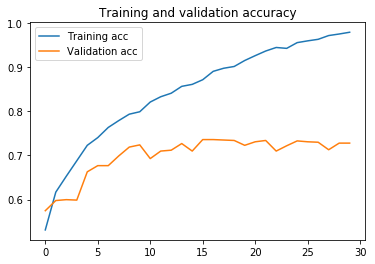

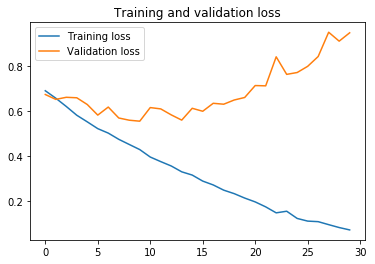

In [37]:
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 使用扩充数据

In [38]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [39]:

import matplotlib.pyplot as plt
from keras.preprocessing import image

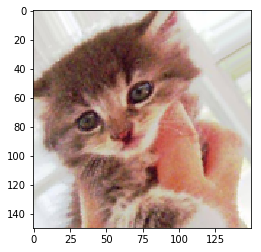

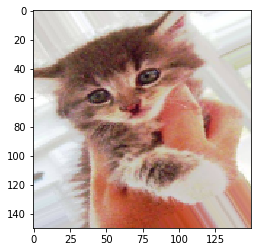

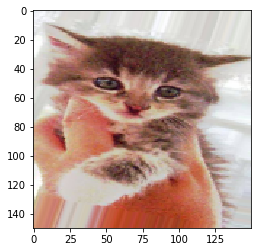

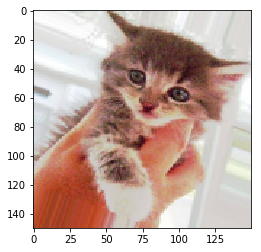

In [40]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

由于这些数据是相互关联的，为了避免过度拟合，在原来模型基础上增加一个Dropout层。

In [41]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [43]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 這是圖像資料的目錄
        train_dir,
        # 所有的圖像大小會被轉換成150x150
        target_size=(150, 150),
        batch_size=32,
        # 由於這是一個二元分類問題, y的lable值也會被轉換成二元的標籤
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
100/100 [==============================] - 79s 793ms/step - loss: 0.7018 - acc: 0.5059 - val_loss: 0.6907 - val_acc: 0.5209
Epoch 2/50
100/100 [==============================] - 76s 759ms/step - loss: 0.7009 - acc: 0.5231 - val_loss: 0.7142 - val_acc: 0.5026
Epoch 3/50
100/100 [==============================] - 78s 779ms/step - loss: 0.7019 - acc: 0.5309 - val_loss: 0.6743 - val_acc: 0.5730
Epoch 4/50
100/100 [==============================] - 83s 827ms/step - loss: 0.6887 - acc: 0.5600 - val_loss: 0.6744 - val_acc: 0.5638
Epoch 5/50
100/100 [==============================] - 81s 809ms/step - loss: 0.6870 - acc: 0.5525 - val_loss: 0.6612 - val_acc: 0.6009
Epoch 6/50
100/100 [==============================] - 78s 780ms/step - loss: 0.6844 - acc: 0.5566 - val_loss: 0.6575 - val_acc: 0.5960
Epoch 7/50
100/100 [==============================] - 80s 798ms/step - loss: 0.6881 - acc: 0.5628 - val_lo

In [44]:
model.save('cats_and_dogs_small_2.h5')

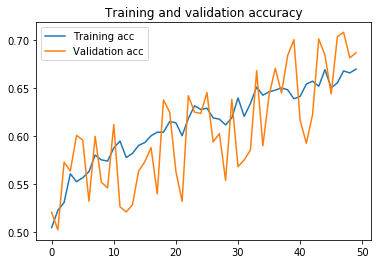

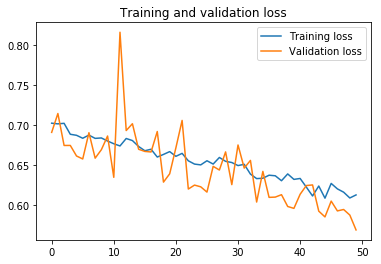

In [45]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()